<a href="https://colab.research.google.com/github/viviakemik/machine-learning/blob/main/dimensionality_reduction/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Book: 

* Hands-on Machine Learning with Scikit-learn & TensorFlow

https://www.amazon.com.br/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646

2. Github: https://github.com/ageron/handson-ml2

3. Courses: 
* https://www.coursera.org/learn/machine-learning
* https://www.coursera.org/learn/ml-classification/home
* https://learning.edx.org/course/course-v1:UCSanDiegoX+DSE220x+1T2021/home

4. Youtube:
* https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

Problem:

MNIST images: the pixels on the image borders are almost always white, so you could completely drop these pixels from the training set without losing much information.

Moreover, two neighboring pixels are often highly correlated: if you merge them into a single pixel

## **Disadvantages**

* Reducing dimensionality **does lose some information** (just like compressing an image to JPEG can degrade its quality), so even though it will speed up training, it may also make your system perform slightly worse.

* It also makes your **pipelines a bit more complex** and thus harder to maintain. 

So you should first **try to train your system with the original** data before considering using dimensionality reduction if training is too slow.


## **Advantages**

* Reducing the dimensionality of the training data may filter out
some noise and unnecessary details and thus result in higher performance

* extremely useful for data visualization (often gain some important insights by visually detecting patterns, such as clusters.)

* communicate your conclusions to people who are not data scientists

* the more dimensions the training set has, the greater the risk of overfitting
it.

# **Projection**

the axis that **minimizes the mean squared distance** between the original dataset and its projection onto that axis (preserves the maximum variance)

Explanation: https://www.youtube.com/watch?v=FgakZw6K1QQ

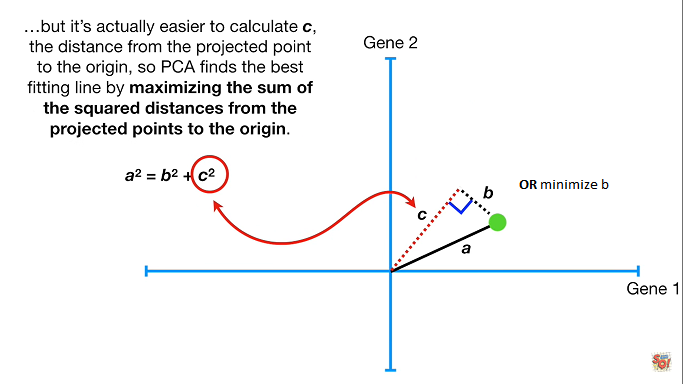


Source: https://learning.edx.org/course/course-v1:UCSanDiegoX+DSE220x+1T2021/home

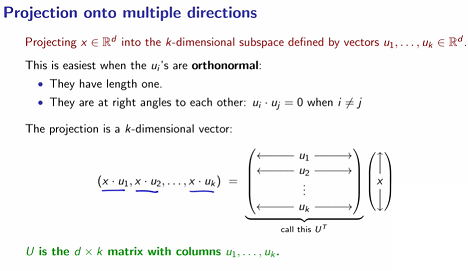

# **Manifold**

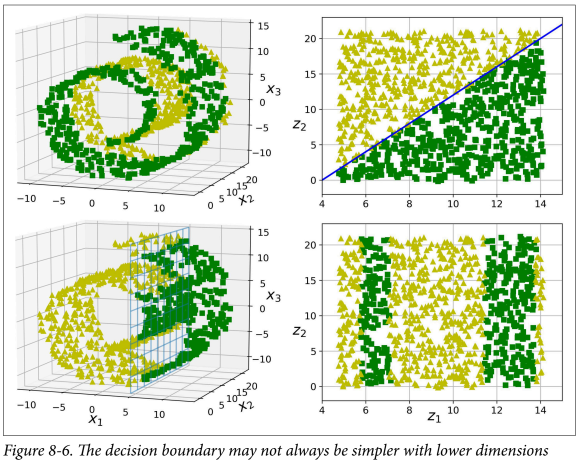

# **PCA**

First it identifies the hyperplane that lies closest to the data, and then
it projects the data onto it.

* PCA identifies the axis that accounts for the largest amount of variance in the training set.

* It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance.

* PCA would also find a third axis, orthogonal to both previous axes, and a fourth, a fifth, and so on

https://www.youtube.com/watch?v=HMOI_lkzW08

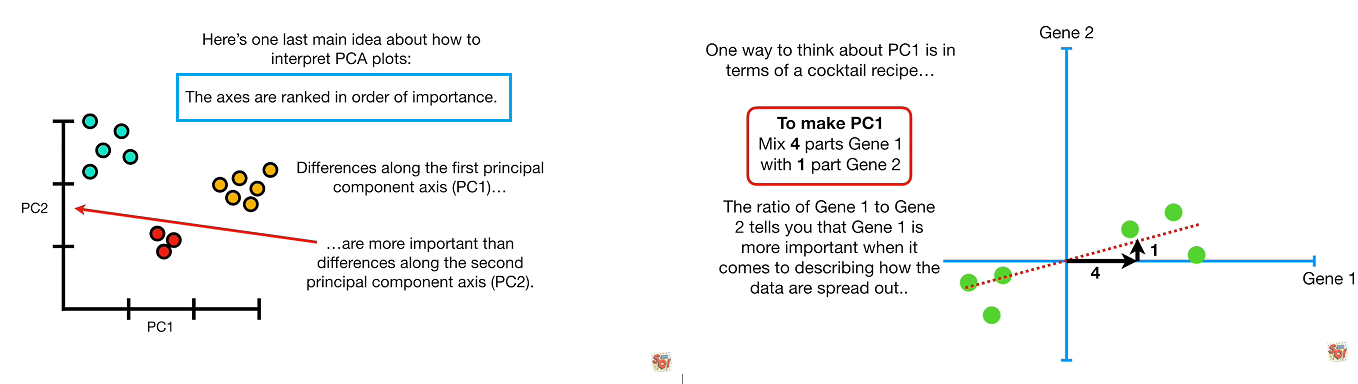


https://www.youtube.com/watch?v=FgakZw6K1QQ

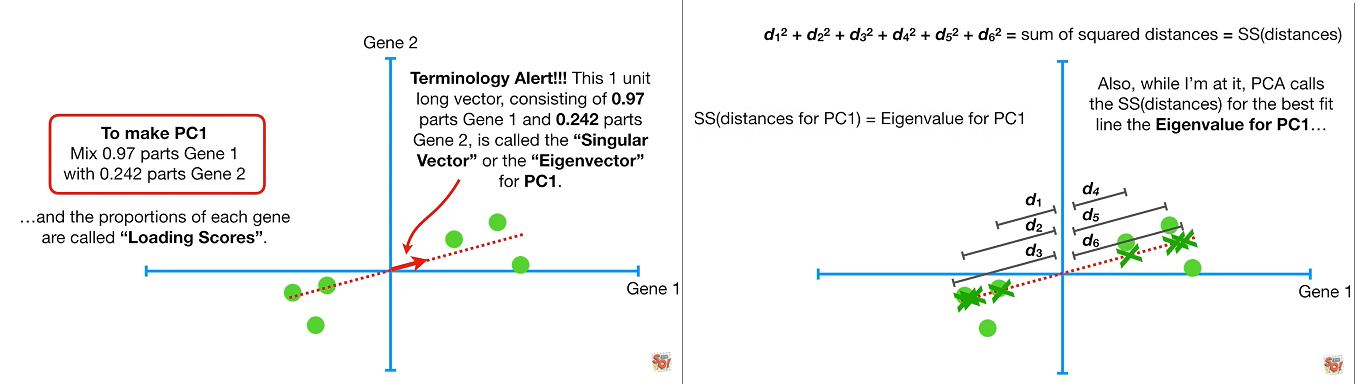

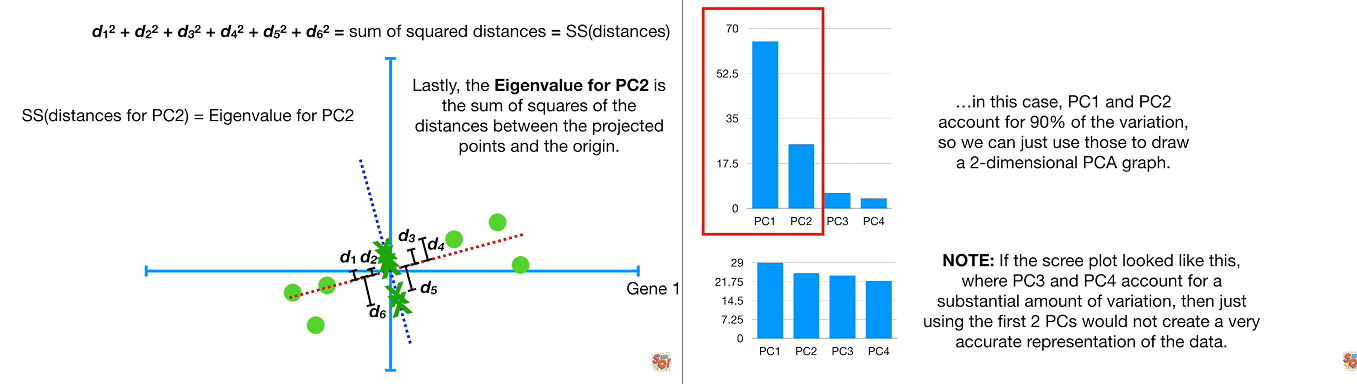

## **Pratical Tips PCA:**

https://www.youtube.com/watch?v=oRvgq966yZg

* Make sure the data are on the same scale
* Make sure your data are centered (Scikit-Learn’s PCA classes take care of centering the data for you)


Before implementing PCA, consider use the whole data. Only if that doesn't do what you want, then implement PCA


Source: https://www.coursera.org/learn/machine-learning

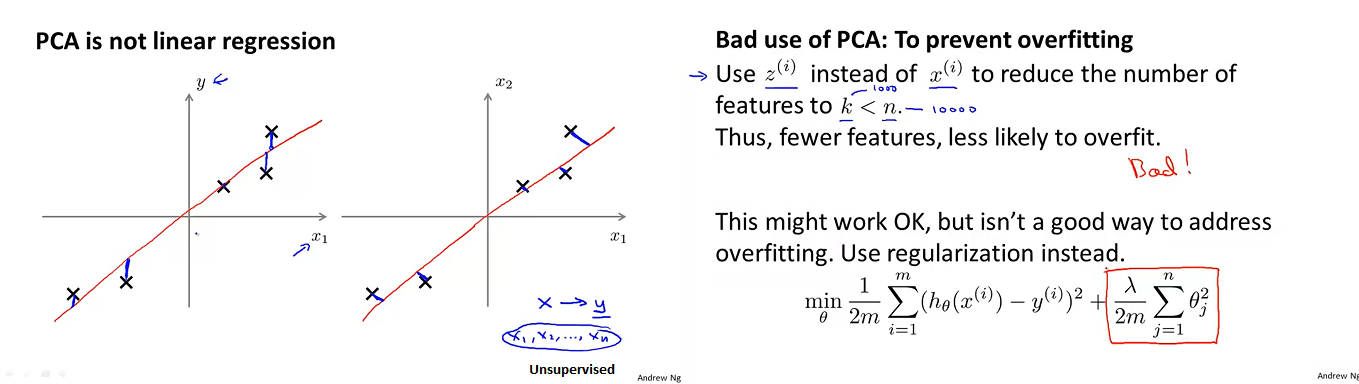

## **Principal Components**

So how can you find the principal components of a training set? Luckily, there is a standard matrix factorization technique called **[Singular Value Decomposition](https://www.youtube.com/watch?v=nbBvuuNVfco)** (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices U Σ VT

In [2]:
#build 3D dataset

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [4]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [5]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

Once you have identified all the principal components, you can reduce the dimensionality of the dataset down to d dimensions by projecting it onto the hyperplane defined by the first d principal components.

the3D dataset is projected down to the 2D plane defined by the first two principal components, preserving a large part of the dataset’s variance.

In [6]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [7]:
X2D_using_svd = X2D

## **Using Scikit-Learn**

* Scikit-Learn’s PCA class implements PCA using SVD decomposition
* it automatically takes care of centering the data

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [9]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [10]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

Notice that running PCA multiple times on slightly different datasets may result in different results. In general the only difference is that some axes may be flipped. In this example, PCA using Scikit-Learn gives the same projection as the one given by the SVD approach, except both axes are flipped:

In [11]:
np.allclose(X2D, -X2D_using_svd)

True

Recover the 3D points projected on the plane (PCA 2D subspace).

In [12]:
X3D_inv = pca.inverse_transform(X2D)

Of course, there was some loss of information during the projection step, so the recovered 3D points are not exactly equal to the original 3D points:

In [13]:
np.allclose(X3D_inv, X)

False

We can compute the reconstruction error:

In [14]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

The inverse transform in the SVD approach looks like this:

In [15]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

The reconstructions from both methods are not identical because Scikit-Learn's PCA class automatically takes care of reversing the mean centering, but if we subtract the mean, we get the same reconstruction:

In [16]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

After fitting the PCA transformer to the dataset, you can access the principal components using the **components_** variable (note that it contains the PCs as horizontal vectors, so, for example, the first principal component is equal to pca.components_.T[:,0]).

In [17]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

Compare to the first two principal components computed using the SVD method:

In [18]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

Notice how the axes are flipped.

Now let's look at the explained variance ratio:

In [19]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

The first dimension explains 84.2% of the variance, while the second explains 14.6%.

By projecting down to 2D, we lost about 1.1% of the variance:

In [20]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

Here is how to compute the explained variance ratio using the SVD approach (recall that s is the diagonal of the matrix S):

In [21]:
np.square(s) / np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

## **Choosing the Right Number of Dimensions**

Instead of arbitrarily choosing the number of dimensions to reduce down to, it is generally preferable to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%).

In [22]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [23]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [25]:
d

154

Yet another option is to plot the explained variance as a function of the number of dimensions. In this case, you can see that reducing the dimensionality down to about 100 dimensions wouldn’t lose too much explained variance.

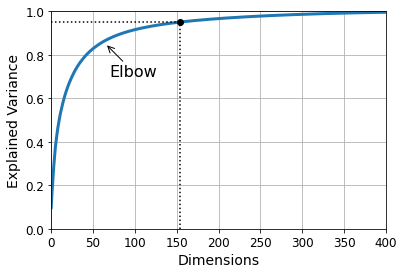

In [101]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

You could then set n_components=d and run PCA again. However, there is a much
better option: instead of specifying the number of principal components you want to preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve:

In [27]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [28]:
pca.n_components_

154

In [29]:
np.sum(pca.explained_variance_ratio_)

0.9503684424557437

## **PCA for Compression**

It is also possible to decompress the reduced dataset back to 784 dimensions by
applying the inverse transformation of the PCA projection.

In [30]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

Of course this won’t give you back the original data, since the projection lost a bit of information (within the 5% variance that was dropped),

In [31]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

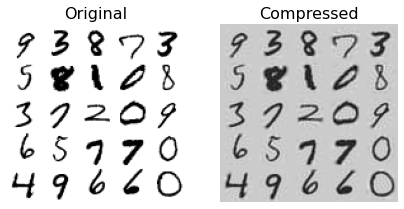

In [32]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

#save_fig("mnist_compression_plot")

The mean squared distance between the original data and the reconstructed data
(compressed and then decompressed) is called the **reconstruction error**.

In [33]:
X_reduced_pca = X_reduced

## **Randomized PCA**

If you set the svd_solver hyperparameter to "randomized", Scikit-Learn uses a stochastic algorithm called Randomized PCA that quickly finds an approximation of the first d principal components.

it is dramatically **faster than full SVD when d is much smaller than n**:

In [34]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

By default, svd_solver is actually set to "auto": Scikit-Learn automatically uses the randomized PCA algorithm if m or n is greater than 500 and d is less than 80% of m or n, or else it uses the full SVD approach.

## **Incremental PCA**

PCA is that they require the whole training set to fit in memory in order for the algorithm to run.

Incremental PCA (IPCA) algorithms have been developed: you can **split the  training set into mini-batches** and feed an IPCA algorithm one mini-batch at a time.

In [35]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [36]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

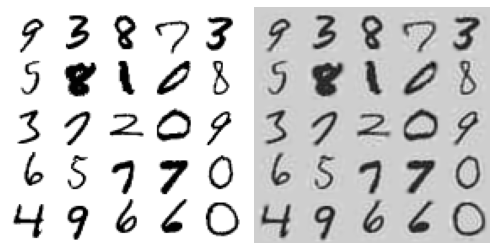

In [37]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [38]:
X_reduced_inc_pca = X_reduced

Let's compare the results of transforming MNIST using regular PCA and incremental PCA. First, the means are equal:

In [39]:
np.allclose(pca.mean_, inc_pca.mean_)

True

But the results are not exactly identical. Incremental PCA gives a very good approximate solution, but it's not perfect:

In [40]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

Alternatively, you can use NumPy’s memmap class, which allows you to manipulate a large array stored in a binary file on disk as if it were entirely in memory;

In [41]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

Now deleting the memmap() object will trigger its Python finalizer, which ensures that the data is saved to disk.

In [42]:
del X_mm

Next, another program would load the data and use it for training:

In [43]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, copy=True, n_components=154, whiten=False)

In [44]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

## **Time complexity**

In [45]:
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components, svd_solver="full")
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for name, pca in (("PCA", regular_pca), ("Inc PCA", inc_pca), ("Rnd PCA", rnd_pca)):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} seconds".format(name, t2 - t1))

n_components = 2
    PCA: 14.0 seconds
    Inc PCA: 22.2 seconds
    Rnd PCA: 3.8 seconds
n_components = 10
    PCA: 10.9 seconds
    Inc PCA: 22.9 seconds
    Rnd PCA: 4.1 seconds
n_components = 154
    PCA: 10.9 seconds
    Inc PCA: 34.2 seconds
    Rnd PCA: 9.0 seconds


Now let's compare PCA and Randomized PCA for datasets of different sizes (number of instances):

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

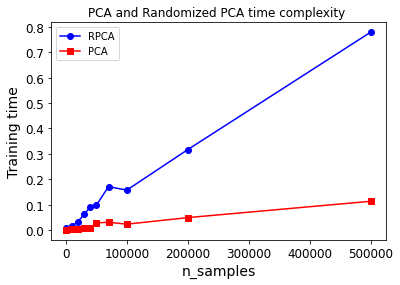

In [46]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

And now let's compare their performance on datasets of 2,000 instances with various numbers of features:

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

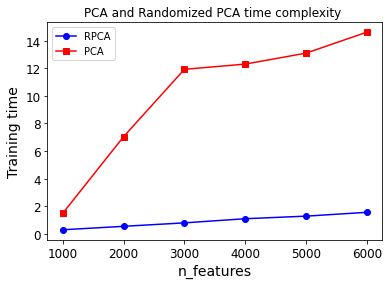

In [47]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components=2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

## **Kernel PCA**

the same trick used in SVM can be applied to PCA, making it possible to perform
complex nonlinear projections for dimensionality reduction.

In [48]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [49]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

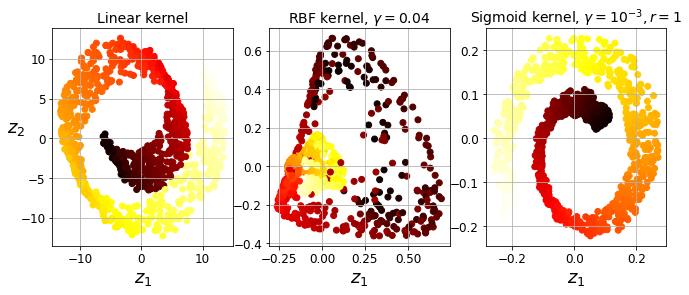

In [50]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

#save_fig("kernel_pca_plot")
plt.show()

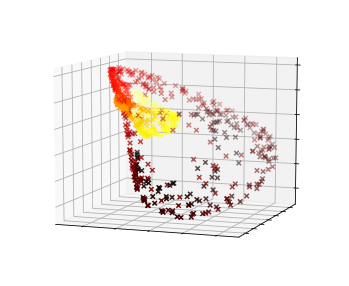

In [51]:
plt.figure(figsize=(6, 5))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

#save_fig("preimage_plot", tight_layout=False)
plt.show()

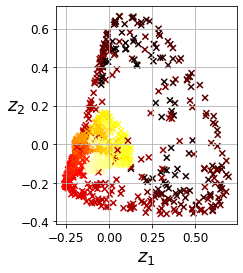

In [52]:
X_reduced = rbf_pca.fit_transform(X)

plt.figure(figsize=(11, 4))
plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

## **Selecting a Kernel and Tuning Hyperparameters**

However, dimensionality reduction is often a preparation step for a supervised learning task, so you can simply use grid search to select the kernel and hyperparameters that lead to the best performance on that task.

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                                 

In [54]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


You may be wondering how to perform this reconstruction. One solution is to train a supervised regression model, with the projected instances as the training set and the original instances as the targets. Scikit-Learn will do this automatically if you set **fit_inverse_transform=True**, as shown in the following code:7

In [55]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

You can then compute the reconstruction pre-image error:

In [56]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.786308795766125

# **LLE**

It is a Manifold Learning technique (method of Non Linear Dimensionality)

* first measuring how each training instance linearly relates to its closest neighbors
* then looking for a low-dimensional representation of the training set where these local relationships are best preserved
* this algorithm scale poorly to very large datasets.


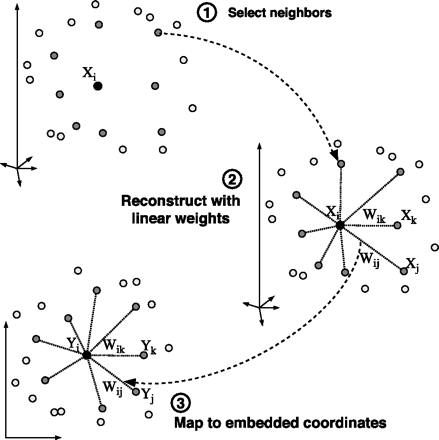

In [57]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

Scikit-Learn’s LocallyLinearEmbedding class to unroll the Swiss roll.

In [58]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

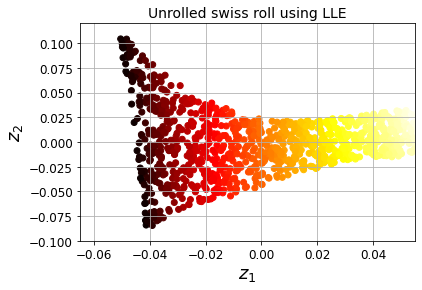

In [59]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

#save_fig("lle_unrolling_plot")
plt.show()

the Swiss roll is completely unrolled and the distances between instances are
locally well preserved.

# **Other Dimensionality Reduction Techniques**

## **Multidimensional Scaling (MDS)**

reduces dimensionality while trying to preserve the distances between the instances

https://www.youtube.com/watch?v=GEn-_dAyYME

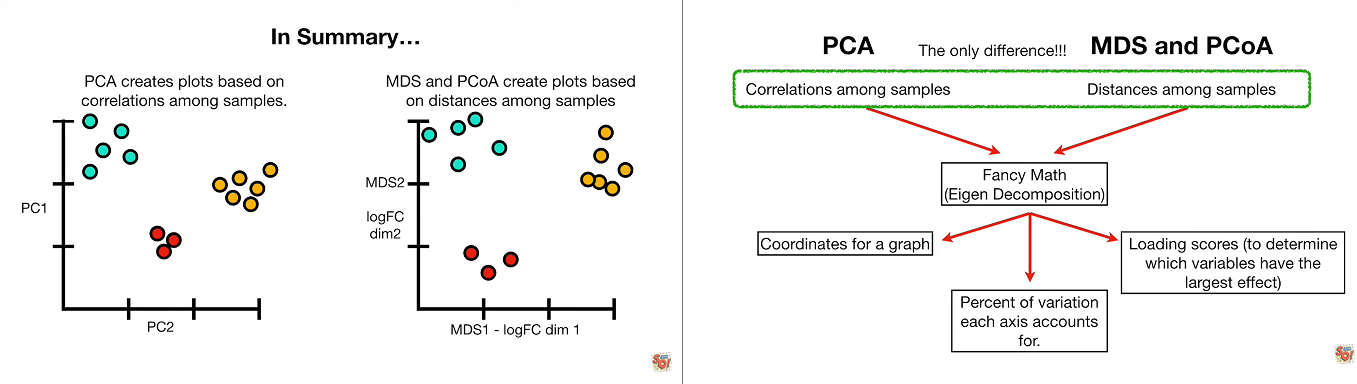

In [60]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

## **Isomap**

creates a graph by connecting each instance to its nearest neighbors, then
reduces dimensionality while trying to preserve the geodesic distances between
the instances.

In [61]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

## **t-Distributed Stochastic Neighbor Embedding (t-SNE)**

reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is mostly used for visualization,

https://www.youtube.com/watch?v=NEaUSP4YerM&t=74s

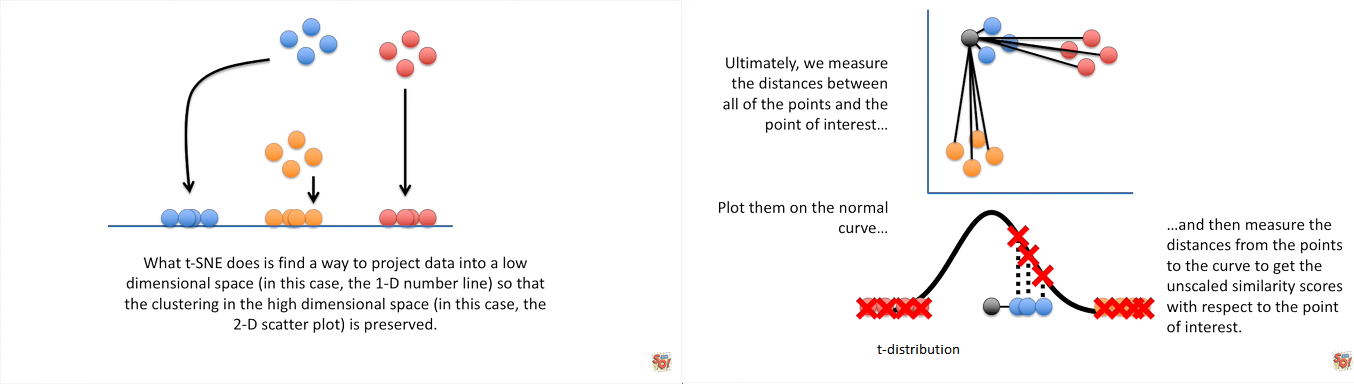

In [62]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

## **Linear Discriminant Analysis (LDA)**

is actually a classification algorithm, but during training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data.

good technique to reduce dimensionality before running another classification
algorithm such as an SVM classifier.

https://www.youtube.com/watch?v=azXCzI57Yfc

it is like PCA but it focuses on the maximizing the separability among known categories

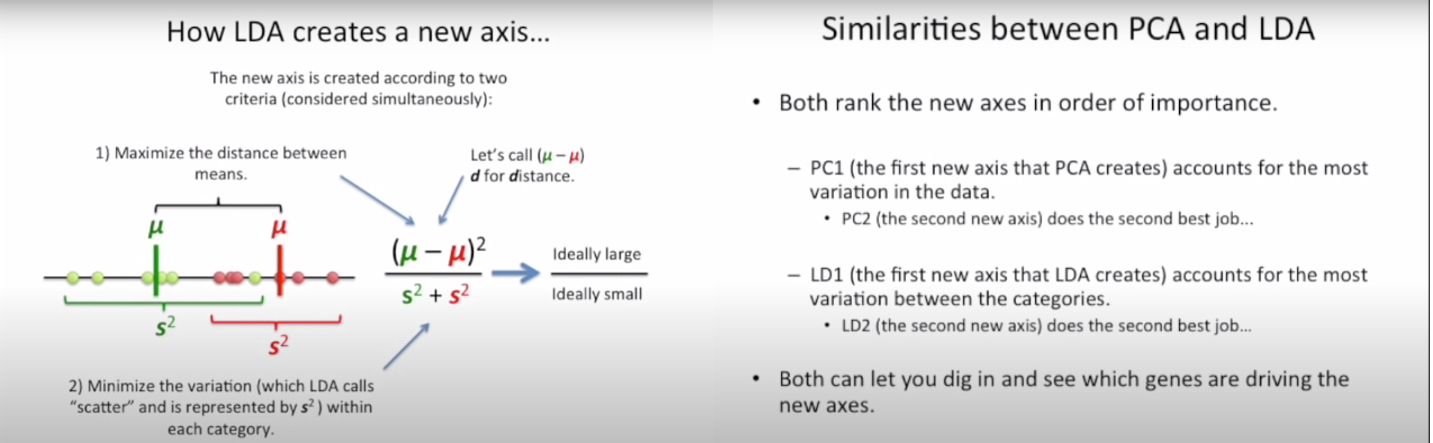

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

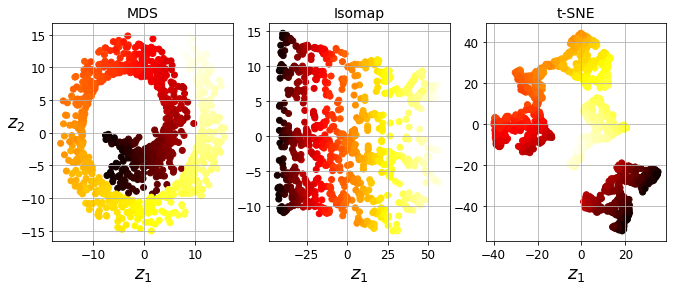

In [64]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

#save_fig("other_dim_reduction_plot")
plt.show()

https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/

# **Extra**

https://www.youtube.com/watch?v=Lsue2gEM9D0

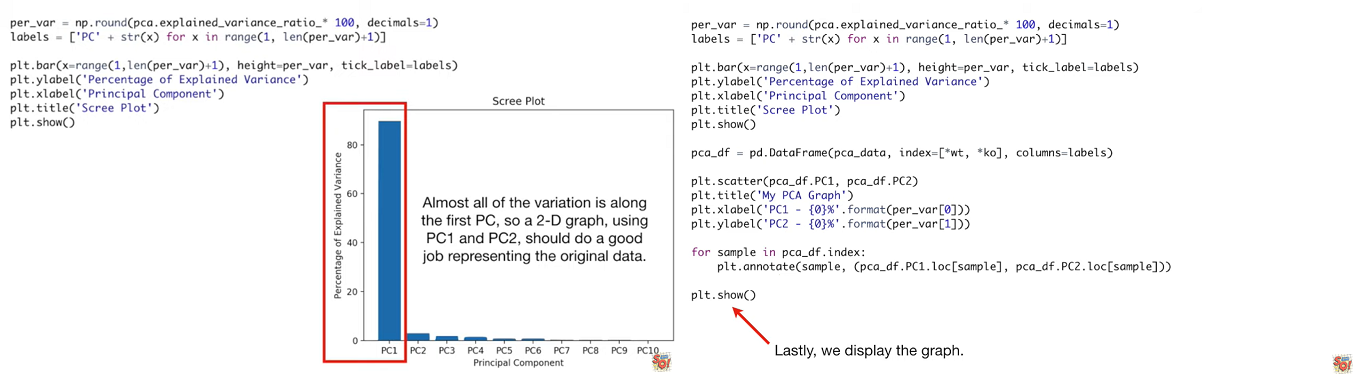

https://www.analyticsvidhya.com/blog/2021/05/20-questions-to-test-your-skills-on-dimensionality-reduction-pca/

# **Exercises**

## **1.**

What are the main motivations for reducing a dataset’s dimensionality? What are
the main drawbacks?

Advantages
* Space
* Speed up learning algorithms
* Visualization

Disadvantages
* Lose information
* Complex pipeline
* Complex interpretation

## **2.**

What is the curse of dimensionality?

High dimensional datasets are at risk of being very sparse (overfitting)

In theory, one solution to the curse of dimensionality could be to **increase the size of the training set** to reach a sufficient density of training instances.


## **3.**

Once a dataset’s dimensionality has been reduced, is it possible to reverse the
operation? If so, how? If not, why?

Yes

## **4.**

Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

Yes, but you can lose much information (see swiss roll)

## **5.**

Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained
variance ratio to 95%. How many dimensions will the resulting dataset have?

You can reduce to one dimension (depends on the dataset, it can be sufficient)

## **6.**

In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA,
or Kernel PCA?

* Incremental: dataset do not fit on memory
* Randomized: fit on memory and want to reduce considerably 
* Kernel: non linear

## **7.**

How can you evaluate the performance of a dimensionality reduction algorithm
on your dataset?

The use of dimensionality reduction in preprocessing before training the model allows measuring the performance of the second algorithm.

* We can therefore infer if an algorithm performed well if the dimensionality reduction does not lose too much information after applying the algorithm.

* measure the reconstruction error

## **8.**

Does it make any sense to chain two different dimensionality reduction algorithms?

Yes

example is using PCA to quickly get rid of a large number of useless dimensions, then applying another much slower dimensionality reduction algorithm, such as LLE. 



## **9.**

Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [65]:
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [66]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [67]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [68]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 53.54s


In [69]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%.

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

Train a new Random Forest classifier on the reduced dataset and see how long it
takes. Was training much faster?

In [71]:
rnd_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [72]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 123.45s


 Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [73]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9481

It is common for performance to drop slightly when reducing dimensionality, because we do lose some useful signal in the process. However, the performance drop is rather severe in this case. So PCA really did not help: it slowed down training and reduced performance.


Can we change the learning algorithm?

In [74]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [75]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 45.41s


In [76]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9255

softmax regression takes much longer to train on this dataset than the random forest classifier, plus it performs worse on the test set. But that's not what we are interested in right now, we want to see how much PCA can help softmax regression. Let's train the softmax regression model using the reduced dataset:

In [77]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [78]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 13.02s


In [79]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9201

A very slight drop in performance, which might be a reasonable price to pay for a 2× speedup, depending on the application.

So there you have it: PCA can give you a formidable speedup... but not always!

## **11.**

Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the
result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [80]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [81]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

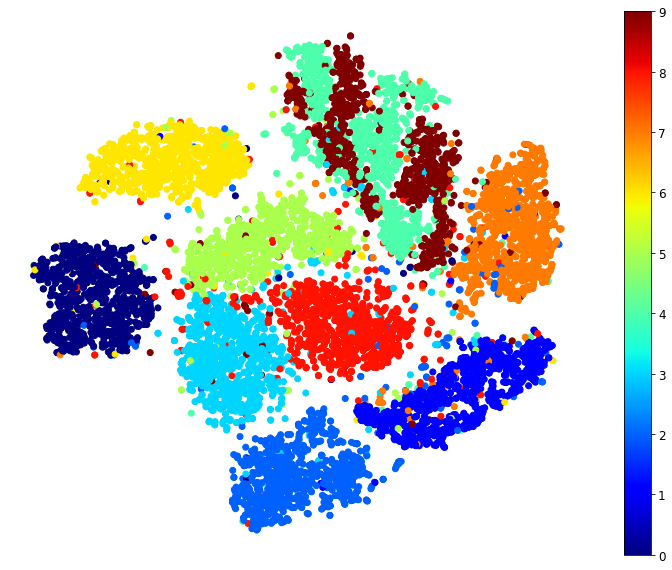

In [82]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()